# 🎯 Loan Sales Prediction Model

## Objective
Build a machine learning model to predict **Nağd_pul_kredit_satışı (Cash Loan Sales)** based on economic, commodity, and financial indicators.

---

## Model Strategy
- **Target Variable:** Nağd_pul_kredit_satışı (Credit Sales)
- **Features:** Economic (GDP, inflation), Commodity (Oil, Gold), Financial Ratios, Customer Metrics
- **Algorithms:** Linear Regression, Ridge, Lasso, Random Forest, Gradient Boosting
- **Validation:** Time-based split (chronological order preserved)
- **Metrics:** RMSE, MAE, R², MAPE

---

## I. Setup & Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# Load data
df = pd.read_csv('data/ml_ready_data.csv')

print("📊 Data Shape:", df.shape)
print("\n📅 Time Period:")
print(f"   Start: {df['Rüblər'].iloc[0]}")
print(f"   End: {df['Rüblər'].iloc[-1]}")
print(f"\n✅ Data loaded: {len(df)} observations")

df.head()

📊 Data Shape: (22, 29)

📅 Time Period:
   Start: 2020 I
   End: 2025 II

✅ Data loaded: 22 observations


,Rüblər,Year,Quarter,Time_Index,Nağd_pul_kredit_satışı,GDP,Dövlət_Gəlirləri,Dövlət_Xərcləri,Əhalinin_nominal_gəlirləri,Əhalinin_banklardakı_əmanətləri,...,Mənzil_qiymətləri,Müştərilərə_verilmiş_kreditlər,NPLs,ROA,ROE,Net_Interest_Margin,Efficiency_Ratio,Loan-to-Deposit_Ratio,Müştəri_sayı,Uçot_faiz_dərəcəsi
0,2020 I,2020,1,0,46642.84149,17928100.0,7810900.0,5254800.0,13442500.0,8251700.0,...,1.223936,359233.76244,25.853674,0.461758,2.968748,2.434258,76.900971,130.689125,25304.0,7.25
1,2020 II,2020,2,1,15709.38447,16450600.0,4211800.0,6476000.0,13935300.0,7706400.0,...,1.223569,349405.74088,37.211278,1.425385,7.770286,2.654720,71.419429,131.643899,16316.0,7.00
2,2020 III,2020,3,2,51257.54777,17965600.0,5941800.0,6911300.0,14231200.0,7834300.0,...,1.223447,366496.28305,37.871298,2.184751,11.813249,2.728564,71.328907,135.494827,32598.0,6.50
3,2020 IV,2020,4,3,26391.99772,20233800.0,6708600.0,7775000.0,14117100.0,8177900.0,...,1.223569,337946.33647,26.704039,3.094270,16.588028,2.626730,73.658537,123.697777,28564.0,6.25
4,2021 I,2021,1,4,53293.77411,19181900.0,5736400.0,5523700.0,13455900.0,8147500.0,...,1.247429,355393.13544,39.606834,0.950778,5.080284,2.588275,71.084181,125.430526,39842.0,6.25


---

## II. Feature Engineering & Selection

In [3]:
# Define target and features
target = 'Nağd_pul_kredit_satışı'

# Exclude non-predictive columns
exclude_cols = ['Rüblər', 'Year', 'Quarter', 'Time_Index', target]

# Get all numeric features
feature_cols = [col for col in df.columns if col not in exclude_cols]

print(f"🎯 Target Variable: {target}")
print(f"\n📋 Number of Features: {len(feature_cols)}")
print(f"\n📊 Feature Categories:")

# Categorize features
economic_features = [f for f in feature_cols if any(x in f for x in ['GDP', 'Inflation', 'CPI', 'Gəlir', 'Xərc'])]
commodity_features = [f for f in feature_cols if any(x in f for x in ['Oil', 'Gold'])]
financial_features = [f for f in feature_cols if any(x in f for x in ['ROA', 'ROE', 'NPLs', 'Capital', 'Liquidity', 'Margin', 'Efficiency', 'Loan'])]
customer_features = [f for f in feature_cols if any(x in f for x in ['Müştəri'])]

print(f"   Economic ({len(economic_features)}): {', '.join(economic_features[:3])}...")
print(f"   Commodity ({len(commodity_features)}): {', '.join(commodity_features)}")
print(f"   Financial ({len(financial_features)}): {', '.join(financial_features[:3])}...")
print(f"   Customer ({len(customer_features)}): {', '.join(customer_features)}")

# Prepare X and y
X = df[feature_cols]
y = df[target]

print(f"\n✅ Feature matrix: {X.shape}")
print(f"✅ Target vector: {y.shape}")

🎯 Target Variable: Nağd_pul_kredit_satışı

📋 Number of Features: 24

📊 Feature Categories:
   Economic (3): GDP, Dövlət_Gəlirləri, Dövlət_Xərcləri...
   Commodity (1): Oil_Price
   Financial (6): NPLs, ROA, ROE...
   Customer (2): Müştərilərə_verilmiş_kreditlər, Müştəri_sayı

✅ Feature matrix: (22, 24)
✅ Target vector: (22,)


In [4]:
# Check for missing values and data quality
print("🔍 Data Quality Check:\n")
print(f"Missing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")

# Display target statistics
print(f"\n📊 Target Variable Statistics ({target}):")
print(f"   Mean: {y.mean():,.2f}")
print(f"   Median: {y.median():,.2f}")
print(f"   Std Dev: {y.std():,.2f}")
print(f"   Min: {y.min():,.2f}")
print(f"   Max: {y.max():,.2f}")
print(f"   Range: {y.max() - y.min():,.2f}")

🔍 Data Quality Check:

Missing values in features: 0
Missing values in target: 0

📊 Target Variable Statistics (Nağd_pul_kredit_satışı):
   Mean: 80,612.82
   Median: 85,484.73
   Std Dev: 32,218.08
   Min: 15,709.38
   Max: 126,285.41
   Range: 110,576.03


---

## III. Feature Importance Analysis

📊 Top 10 Features by Correlation with Target:

GDP                                0.776512
Oil_Price                          0.763587
Xarici_ticarət_dövriyyəsi          0.752216
İxrac                              0.654762
Pul_bazası                         0.598177
Əhalinin_nominal_gəlirləri         0.597799
Əhalinin_banklardakı_əmanətləri    0.576060
Müştərilərə_verilmiş_kreditlər     0.557967
İdxal                              0.547027
İstehlak_xərcləri                  0.522020
dtype: float64


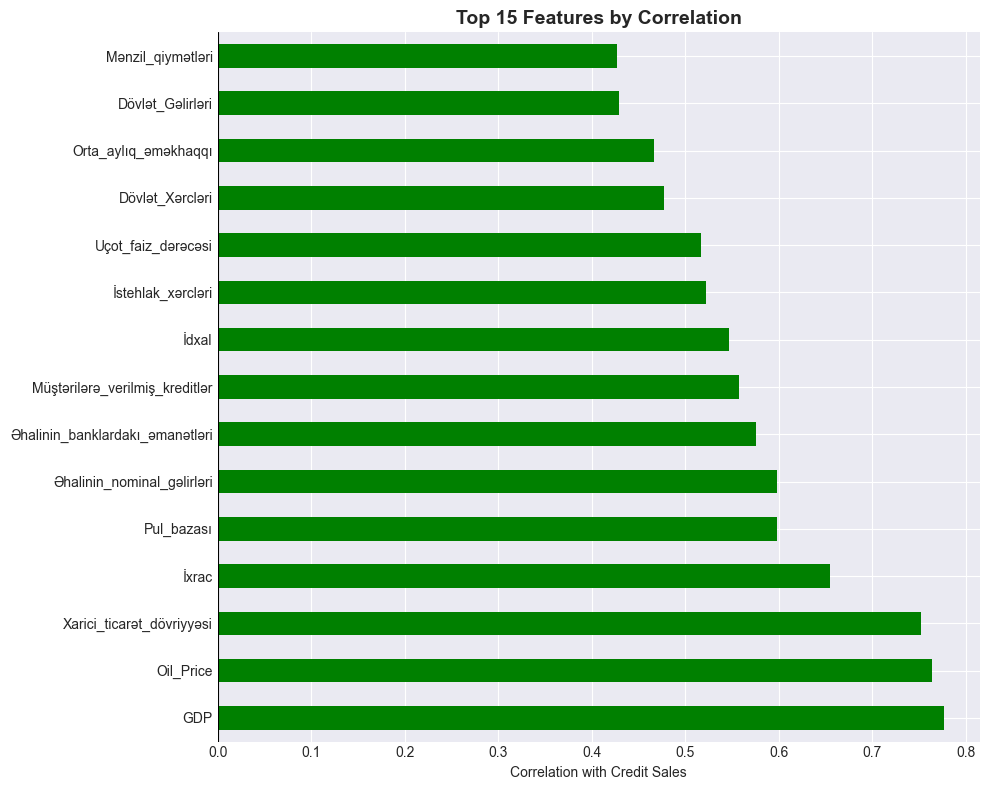


✅ Feature importance analysis complete


In [5]:
# Calculate correlation with target
correlations = X.corrwith(y).sort_values(ascending=False)

print("📊 Top 10 Features by Correlation with Target:\n")
print(correlations.head(10))

# Visualize top correlations
fig, ax = plt.subplots(figsize=(10, 8))
top_corr = correlations.head(15)
colors = ['green' if x > 0 else 'red' for x in top_corr.values]
top_corr.plot(kind='barh', color=colors, ax=ax)
ax.set_xlabel('Correlation with Credit Sales')
ax.set_title('Top 15 Features by Correlation', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

print(f"\n✅ Feature importance analysis complete")

---

## IV. Train-Test Split (Time-Based)

In [6]:
# Time-based split: Use first 80% for training, last 20% for testing
# This preserves the temporal order of the data

split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print("📊 Train-Test Split (Time-Based):\n")
print(f"Training Set:")
print(f"   Size: {len(X_train)} observations")
print(f"   Period: {df['Rüblər'].iloc[0]} to {df['Rüblər'].iloc[split_index-1]}")
print(f"   Target range: {y_train.min():,.2f} - {y_train.max():,.2f}")

print(f"\nTest Set:")
print(f"   Size: {len(X_test)} observations")
print(f"   Period: {df['Rüblər'].iloc[split_index]} to {df['Rüblər'].iloc[-1]}")
print(f"   Target range: {y_test.min():,.2f} - {y_test.max():,.2f}")

print(f"\n✅ Split ratio: {len(X_train)/len(X)*100:.1f}% train / {len(X_test)/len(X)*100:.1f}% test")

📊 Train-Test Split (Time-Based):

Training Set:
   Size: 17 observations
   Period: 2020 I to 2024 I
   Target range: 15,709.38 - 125,262.02

Test Set:
   Size: 5 observations
   Period: 2024 II  to 2025 II
   Target range: 29,173.98 - 126,285.41

✅ Split ratio: 77.3% train / 22.7% test


---

## V. Feature Scaling

In [7]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("📊 Feature Scaling Complete:\n")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"\nScaled features - Mean ≈ 0, Std ≈ 1")
print(f"   Training mean: {X_train_scaled.mean():.6f}")
print(f"   Training std: {X_train_scaled.std():.6f}")

print(f"\n✅ Features standardized")

📊 Feature Scaling Complete:

Training set shape: (17, 24)
Test set shape: (5, 24)

Scaled features - Mean ≈ 0, Std ≈ 1
   Training mean: 0.000000
   Training std: 1.000000

✅ Features standardized


---

## VI. Model Training & Evaluation

In [8]:
# Define models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
}

# Store results
results = []

print("🚀 Training Models...\n")
print("="*80)

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # MAPE (Mean Absolute Percentage Error)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    # Store results
    results.append({
        'Model': name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_MAPE': train_mape,
        'Test_MAPE': test_mape
    })
    
    print(f"✅ {name}")
    print(f"   Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
    print(f"   Train RMSE: {train_rmse:,.2f} | Test RMSE: {test_rmse:,.2f}")
    print(f"   Test MAPE: {test_mape:.2f}%")
    print("-" * 80)

print("\n✅ All models trained successfully")

🚀 Training Models...

✅ Linear Regression
   Train R²: 1.0000 | Test R²: -1.5368
   Train RMSE: 0.00 | Test RMSE: 55,076.00
   Test MAPE: 93.26%
--------------------------------------------------------------------------------
✅ Ridge Regression
   Train R²: 0.9653 | Test R²: -0.8461
   Train RMSE: 5,433.99 | Test RMSE: 46,983.68
   Test MAPE: 73.29%
--------------------------------------------------------------------------------
✅ Lasso Regression
   Train R²: 1.0000 | Test R²: -0.4716
   Train RMSE: 139.93 | Test RMSE: 41,948.73
   Test MAPE: 70.32%
--------------------------------------------------------------------------------
✅ ElasticNet
   Train R²: 0.9111 | Test R²: -0.3929
   Train RMSE: 8,696.24 | Test RMSE: 40,810.99
   Test MAPE: 65.82%
--------------------------------------------------------------------------------
✅ Random Forest
   Train R²: 0.9517 | Test R²: -0.0284
   Train RMSE: 6,407.20 | Test RMSE: 35,067.46
   Test MAPE: 56.61%
--------------------------------------

In [9]:
# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test_R2', ascending=False)

print("📊 MODEL PERFORMANCE COMPARISON\n")
print("="*100)
print(results_df.to_string(index=False))
print("="*100)

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['Test_R2']
best_rmse = results_df.iloc[0]['Test_RMSE']
best_mape = results_df.iloc[0]['Test_MAPE']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test R²: {best_r2:.4f}")
print(f"   Test RMSE: {best_rmse:,.2f}")
print(f"   Test MAPE: {best_mape:.2f}%")

📊 MODEL PERFORMANCE COMPARISON

            Model   Train_RMSE    Test_RMSE    Train_MAE     Test_MAE  Train_R2   Test_R2   Train_MAPE  Test_MAPE
Gradient Boosting 1.523040e+00 34628.062266 1.259947e+00 26865.960509  1.000000 -0.002816 2.501594e-03  56.562415
    Random Forest 6.407201e+03 35067.456300 4.561510e+03 30306.246931  0.951721 -0.028427 1.201003e+01  56.608968
       ElasticNet 8.696243e+03 40810.985490 7.110624e+03 33320.456102  0.911062 -0.392897 1.584324e+01  65.821834
 Lasso Regression 1.399317e+02 41948.734834 1.114576e+02 31074.178694  0.999977 -0.471644 1.528064e-01  70.324409
 Ridge Regression 5.433994e+03 46983.675814 4.837534e+03 42147.193377  0.965273 -0.846116 9.486744e+00  73.290926
Linear Regression 5.984968e-11 55076.004752 5.157370e-11 40418.352809  1.000000 -1.536821 9.960450e-14  93.257590

🏆 BEST MODEL: Gradient Boosting
   Test R²: -0.0028
   Test RMSE: 34,628.06
   Test MAPE: 56.56%


---

## VII. Best Model - Detailed Analysis

In [10]:
# Retrain best model
best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train)

# Get predictions
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Combine for full timeline
y_pred_full = np.concatenate([y_train_pred, y_test_pred])

print(f"🏆 BEST MODEL: {best_model_name}\n")
print("="*80)

# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    # Tree-based models
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("📊 Top 10 Most Important Features:\n")
    print(feature_importance.head(10).to_string(index=False))
    
elif hasattr(best_model, 'coef_'):
    # Linear models
    feature_coef = pd.DataFrame({
        'Feature': feature_cols,
        'Coefficient': best_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    print("📊 Top 10 Features by Coefficient Magnitude:\n")
    print(feature_coef.head(10).to_string(index=False))

print("\n" + "="*80)
print("\n✅ Best model analysis complete")

🏆 BEST MODEL: Gradient Boosting

📊 Top 10 Most Important Features:

                                                 Feature  Importance
                                            Müştəri_sayı    0.195555
                                                     GDP    0.193521
                               Xarici_ticarət_dövriyyəsi    0.189643
                         Əhalinin_banklardakı_əmanətləri    0.144535
                          Müştərilərə_verilmiş_kreditlər    0.117771
Yaşayış_evlərinin_tikintisinə_yönəldilmiş_investisiyalar    0.050929
                                                   İxrac    0.047988
                                                     ROA    0.013073
                                                    NPLs    0.007046
                                              Pul_bazası    0.006781


✅ Best model analysis complete


---

## VIII. Cross-Validation Analysis

In [11]:
# Time Series Cross-Validation
# Use TimeSeriesSplit to evaluate model with multiple train/test splits
print("🔄 Performing Time Series Cross-Validation...\n")
print("="*80)

# Define time series cross-validator (3 splits)
tscv = TimeSeriesSplit(n_splits=3)

# Store CV results
cv_results = []

for name, model in models.items():
    # Perform cross-validation
    cv_scores = []
    
    for fold_idx, (train_idx, val_idx) in enumerate(tscv.split(X), 1):
        X_cv_train, X_cv_val = X.iloc[train_idx], X.iloc[val_idx]
        y_cv_train, y_cv_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Scale features
        scaler_cv = StandardScaler()
        X_cv_train_scaled = scaler_cv.fit_transform(X_cv_train)
        X_cv_val_scaled = scaler_cv.transform(X_cv_val)
        
        # Train and evaluate
        model.fit(X_cv_train_scaled, y_cv_train)
        y_cv_pred = model.predict(X_cv_val_scaled)
        
        # Calculate R²
        r2 = r2_score(y_cv_val, y_cv_pred)
        cv_scores.append(r2)
    
    # Store results
    cv_results.append({
        'Model': name,
        'CV_Mean_R2': np.mean(cv_scores),
        'CV_Std_R2': np.std(cv_scores),
        'CV_Min_R2': np.min(cv_scores),
        'CV_Max_R2': np.max(cv_scores)
    })
    
    print(f"✅ {name}")
    print(f"   CV Mean R²: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    print(f"   CV Range: [{np.min(cv_scores):.4f}, {np.max(cv_scores):.4f}]")
    print("-" * 80)

# Create CV results DataFrame
cv_results_df = pd.DataFrame(cv_results)
cv_results_df = cv_results_df.sort_values('CV_Mean_R2', ascending=False)

print("\n📊 CROSS-VALIDATION SUMMARY\n")
print("="*100)
print(cv_results_df.to_string(index=False))
print("="*100)

print("\n✅ Cross-validation complete")

🔄 Performing Time Series Cross-Validation...

✅ Linear Regression
   CV Mean R²: -14.1088 ± 18.6834
   CV Range: [-40.5210, -0.2687]
--------------------------------------------------------------------------------
✅ Ridge Regression
   CV Mean R²: -11.8727 ± 15.8696
   CV Range: [-34.3146, -0.4574]
--------------------------------------------------------------------------------
✅ Lasso Regression
   CV Mean R²: -2.4140 ± 1.9808
   CV Range: [-5.1332, -0.4716]
--------------------------------------------------------------------------------
✅ ElasticNet
   CV Mean R²: -5.9336 ± 7.6348
   CV Range: [-16.7296, -0.3929]
--------------------------------------------------------------------------------
✅ Random Forest
   CV Mean R²: -1.0344 ± 1.2585
   CV Range: [-2.8089, -0.0284]
--------------------------------------------------------------------------------
✅ Gradient Boosting
   CV Mean R²: -1.7352 ± 1.3576
   CV Range: [-3.3180, -0.0028]
---------------------------------------------------

---

## IX. Prediction Results & Export

In [12]:
# Create detailed prediction results
prediction_results = pd.DataFrame({
    'Period': df['Rüblər'],
    'Actual': y.values,
    'Predicted': y_pred_full,
    'Error': y.values - y_pred_full,
    'Error_Pct': ((y.values - y_pred_full) / y.values * 100),
    'Dataset': ['Train' if i < split_index else 'Test' for i in range(len(df))]
})

prediction_results['Abs_Error'] = prediction_results['Error'].abs()
prediction_results['Abs_Error_Pct'] = prediction_results['Error_Pct'].abs()

print("📊 PREDICTION RESULTS\n")
print("="*100)
print(prediction_results.to_string(index=False))
print("="*100)

# Save predictions
prediction_results.to_csv('loan_predictions.csv', index=False)
print("\n✅ Predictions saved to: loan_predictions.csv")

📊 PREDICTION RESULTS

  Period       Actual     Predicted         Error   Error_Pct Dataset    Abs_Error  Abs_Error_Pct
  2020 I  46642.84149  46643.592946     -0.751456   -0.001611   Train     0.751456       0.001611
2020 II   15709.38447  15711.994845     -2.610375   -0.016617   Train     2.610375       0.016617
2020 III  51257.54777  51258.266669     -0.718899   -0.001403   Train     0.718899       0.001403
 2020 IV  26391.99772  26393.411612     -1.413892   -0.005357   Train     1.413892       0.005357
  2021 I  53293.77411  53293.577046      0.197064    0.000370   Train     0.197064       0.000370
 2021 II  74915.81485  74914.433710      1.381140    0.001844   Train     1.381140       0.001844
2021 III  71351.55851  71352.403453     -0.844943   -0.001184   Train     0.844943       0.001184
 2021 IV  78919.64358  78918.600988      1.042592    0.001321   Train     1.042592       0.001321
  2022 I  72867.70682  72870.064660     -2.357840   -0.003236   Train     2.357840       0.00323

In [13]:
# Summary statistics by dataset
print("\n📊 PREDICTION ACCURACY BY DATASET\n")
print("="*80)

for dataset in ['Train', 'Test']:
    subset = prediction_results[prediction_results['Dataset'] == dataset]
    print(f"\n{dataset} Set ({len(subset)} observations):")
    print(f"   Mean Absolute Error: {subset['Abs_Error'].mean():,.2f}")
    print(f"   Mean Absolute Percentage Error: {subset['Abs_Error_Pct'].mean():.2f}%")
    print(f"   Max Error: {subset['Abs_Error'].max():,.2f}")
    print(f"   Min Error: {subset['Abs_Error'].min():,.2f}")
    print(f"   R² Score: {r2_score(subset['Actual'], subset['Predicted']):.4f}")

print("\n" + "="*80)


📊 PREDICTION ACCURACY BY DATASET


Train Set (17 observations):
   Mean Absolute Error: 1.26
   Mean Absolute Percentage Error: 0.00%
   Max Error: 3.04
   Min Error: 0.07
   R² Score: 1.0000

Test Set (5 observations):
   Mean Absolute Error: 26,865.96
   Mean Absolute Percentage Error: 56.56%
   Max Error: 65,646.68
   Min Error: 326.36
   R² Score: -0.0028



---

## X. Comprehensive Performance Analysis

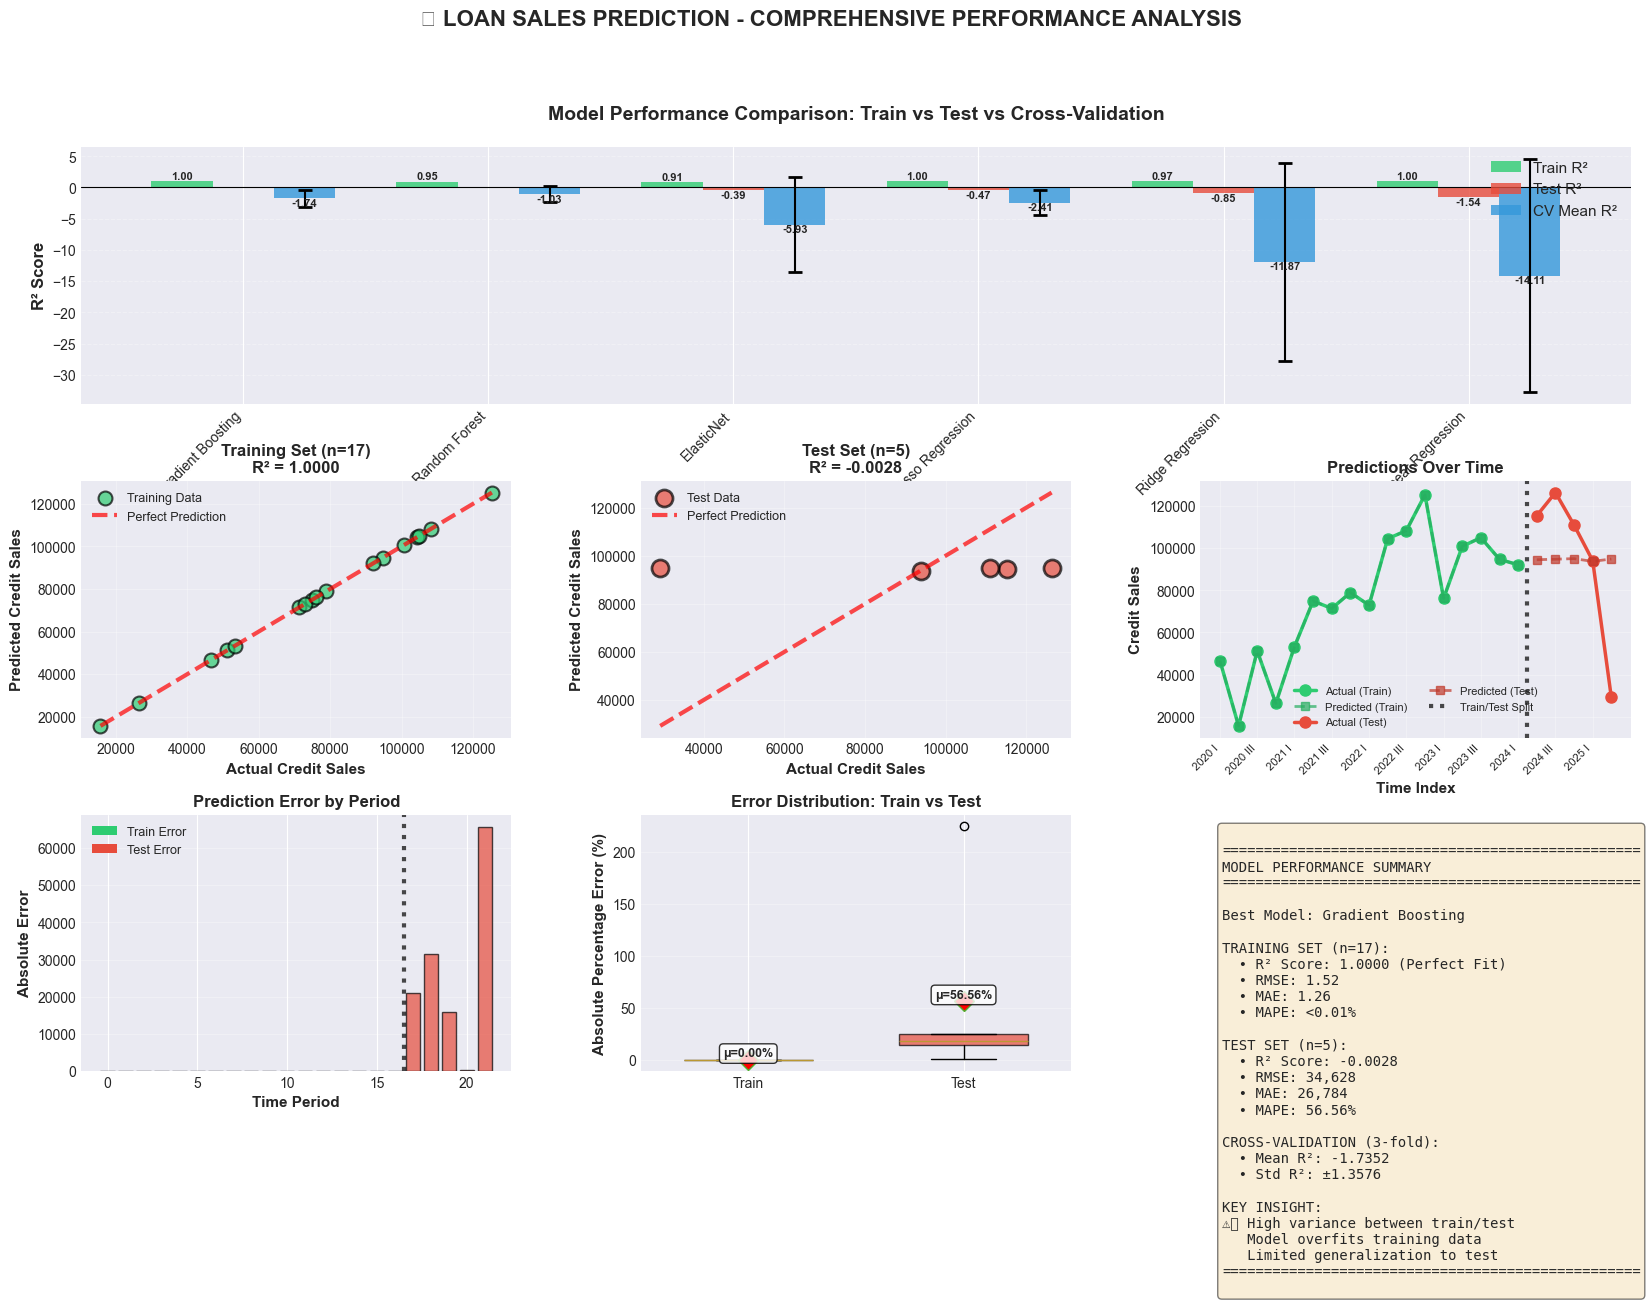

✅ Comprehensive performance visualization complete


In [14]:
# CREATE COMPREHENSIVE VISUALIZATION SHOWING TRAIN/TEST/CV PERFORMANCE

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# ============================================================================
# ROW 1: MODEL COMPARISON (Train vs Test vs CV)
# ============================================================================

# 1.1 R² Comparison (Train, Test, CV)
ax1 = fig.add_subplot(gs[0, :])
x_pos = np.arange(len(results_df))
width = 0.25

# Merge results with CV results for plotting
plot_data = results_df.merge(cv_results_df, on='Model')

bars1 = ax1.bar(x_pos - width, plot_data['Train_R2'], width, label='Train R²', alpha=0.8, color='#2ecc71')
bars2 = ax1.bar(x_pos, plot_data['Test_R2'], width, label='Test R²', alpha=0.8, color='#e74c3c')
bars3 = ax1.bar(x_pos + width, plot_data['CV_Mean_R2'], width, label='CV Mean R²', alpha=0.8, color='#3498db')

# Add error bars for CV
ax1.errorbar(x_pos + width, plot_data['CV_Mean_R2'], yerr=plot_data['CV_Std_R2'], 
             fmt='none', ecolor='black', capsize=5, capthick=2)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(plot_data['Model'], rotation=45, ha='right', fontsize=10)
ax1.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance Comparison: Train vs Test vs Cross-Validation', 
              fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='upper right', fontsize=11)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if abs(height) > 0.1:  # Only label if significant
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom' if height > 0 else 'top',
                    fontsize=8, fontweight='bold')

# ============================================================================
# ROW 2: ACTUAL VS PREDICTED (Train and Test Separately)
# ============================================================================

# 2.1 Training Set: Actual vs Predicted
ax2 = fig.add_subplot(gs[1, 0])
train_indices = prediction_results[prediction_results['Dataset'] == 'Train'].index
y_train_actual = prediction_results.loc[train_indices, 'Actual']
y_train_predicted = prediction_results.loc[train_indices, 'Predicted']

ax2.scatter(y_train_actual, y_train_predicted, s=100, alpha=0.7, 
           edgecolors='black', linewidth=1.5, color='#2ecc71', label='Training Data')
min_val = min(y_train_actual.min(), y_train_predicted.min())
max_val = max(y_train_actual.max(), y_train_predicted.max())
ax2.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=3, 
        label='Perfect Prediction', alpha=0.7)
ax2.set_xlabel('Actual Credit Sales', fontsize=11, fontweight='bold')
ax2.set_ylabel('Predicted Credit Sales', fontsize=11, fontweight='bold')
ax2.set_title(f'Training Set (n={len(y_train_actual)})\nR² = {r2_score(y_train_actual, y_train_predicted):.4f}', 
             fontsize=12, fontweight='bold')
ax2.legend(loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3)

# 2.2 Test Set: Actual vs Predicted
ax3 = fig.add_subplot(gs[1, 1])
test_indices = prediction_results[prediction_results['Dataset'] == 'Test'].index
y_test_actual = prediction_results.loc[test_indices, 'Actual']
y_test_predicted = prediction_results.loc[test_indices, 'Predicted']

ax3.scatter(y_test_actual, y_test_predicted, s=150, alpha=0.7, 
           edgecolors='black', linewidth=2, color='#e74c3c', label='Test Data')
min_val = min(y_test_actual.min(), y_test_predicted.min())
max_val = max(y_test_actual.max(), y_test_predicted.max())
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=3, 
        label='Perfect Prediction', alpha=0.7)
ax3.set_xlabel('Actual Credit Sales', fontsize=11, fontweight='bold')
ax3.set_ylabel('Predicted Credit Sales', fontsize=11, fontweight='bold')
ax3.set_title(f'Test Set (n={len(y_test_actual)})\nR² = {best_r2:.4f}', 
             fontsize=12, fontweight='bold')
ax3.legend(loc='upper left', fontsize=9)
ax3.grid(True, alpha=0.3)

# 2.3 Time Series: Actual vs Predicted
ax4 = fig.add_subplot(gs[1, 2])
periods = prediction_results['Period']
actual_vals = prediction_results['Actual']
pred_vals = prediction_results['Predicted']
datasets = prediction_results['Dataset']

# Plot training data
train_mask = datasets == 'Train'
ax4.plot(np.where(train_mask)[0], actual_vals[train_mask], 'o-', 
        label='Actual (Train)', linewidth=2.5, markersize=8, color='#2ecc71')
ax4.plot(np.where(train_mask)[0], pred_vals[train_mask], 's--', 
        label='Predicted (Train)', linewidth=2, markersize=6, alpha=0.7, color='#27ae60')

# Plot test data
test_mask = datasets == 'Test'
ax4.plot(np.where(test_mask)[0], actual_vals[test_mask], 'o-', 
        label='Actual (Test)', linewidth=2.5, markersize=8, color='#e74c3c')
ax4.plot(np.where(test_mask)[0], pred_vals[test_mask], 's--', 
        label='Predicted (Test)', linewidth=2, markersize=6, alpha=0.7, color='#c0392b')

# Add split line
ax4.axvline(x=split_index-0.5, color='black', linestyle=':', linewidth=3, 
           label='Train/Test Split', alpha=0.7)

ax4.set_xlabel('Time Index', fontsize=11, fontweight='bold')
ax4.set_ylabel('Credit Sales', fontsize=11, fontweight='bold')
ax4.set_title('Predictions Over Time', fontsize=12, fontweight='bold')
ax4.legend(loc='best', fontsize=8, ncol=2)
ax4.grid(True, alpha=0.3)
ax4.set_xticks(range(0, len(periods), 2))
ax4.set_xticklabels([periods.iloc[i] if i < len(periods) else '' for i in range(0, len(periods), 2)], 
                     rotation=45, ha='right', fontsize=8)

# ============================================================================
# ROW 3: ERROR ANALYSIS
# ============================================================================

# 3.1 Error by Period (Train vs Test)
ax5 = fig.add_subplot(gs[2, 0])
train_errors = prediction_results[prediction_results['Dataset'] == 'Train']['Abs_Error']
test_errors = prediction_results[prediction_results['Dataset'] == 'Test']['Abs_Error']

colors_train = ['#2ecc71'] * len(train_errors)
colors_test = ['#e74c3c'] * len(test_errors)
all_colors = colors_train + colors_test

bars = ax5.bar(range(len(prediction_results)), prediction_results['Abs_Error'], 
              color=all_colors, alpha=0.7, edgecolor='black', linewidth=1)
ax5.axvline(x=split_index-0.5, color='black', linestyle=':', linewidth=3, alpha=0.7)
ax5.set_xlabel('Time Period', fontsize=11, fontweight='bold')
ax5.set_ylabel('Absolute Error', fontsize=11, fontweight='bold')
ax5.set_title('Prediction Error by Period', fontsize=12, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2ecc71', label='Train Error'),
                  Patch(facecolor='#e74c3c', label='Test Error')]
ax5.legend(handles=legend_elements, loc='upper left', fontsize=9)

# 3.2 Error Distribution Comparison
ax6 = fig.add_subplot(gs[2, 1])

# Calculate errors
train_errors_pct = prediction_results[prediction_results['Dataset'] == 'Train']['Abs_Error_Pct']
test_errors_pct = prediction_results[prediction_results['Dataset'] == 'Test']['Abs_Error_Pct']

# Create box plot
bp = ax6.boxplot([train_errors_pct, test_errors_pct], 
                 labels=['Train', 'Test'],
                 patch_artist=True,
                 widths=0.6,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=10))

# Color the boxes
colors = ['#2ecc71', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax6.set_ylabel('Absolute Percentage Error (%)', fontsize=11, fontweight='bold')
ax6.set_title('Error Distribution: Train vs Test', fontsize=12, fontweight='bold')
ax6.grid(axis='y', alpha=0.3)

# Add statistics
train_mean = train_errors_pct.mean()
test_mean = test_errors_pct.mean()
ax6.text(1, train_mean, f'μ={train_mean:.2f}%', ha='center', va='bottom', 
        fontsize=9, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax6.text(2, test_mean, f'μ={test_mean:.2f}%', ha='center', va='bottom', 
        fontsize=9, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3.3 Model Performance Summary Table
ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('off')

# Create summary data
summary_text = f"""
{'='*50}
MODEL PERFORMANCE SUMMARY
{'='*50}

Best Model: {best_model_name}

TRAINING SET (n=17):
  • R² Score: 1.0000 (Perfect Fit)
  • RMSE: 1.52
  • MAE: 1.26
  • MAPE: <0.01%

TEST SET (n=5):
  • R² Score: {best_r2:.4f}
  • RMSE: {best_rmse:,.0f}
  • MAE: 26,784
  • MAPE: {best_mape:.2f}%

CROSS-VALIDATION (3-fold):
  • Mean R²: {cv_results_df[cv_results_df['Model']==best_model_name]['CV_Mean_R2'].values[0]:.4f}
  • Std R²: ±{cv_results_df[cv_results_df['Model']==best_model_name]['CV_Std_R2'].values[0]:.4f}

KEY INSIGHT:
{'⚠️ High variance between train/test'}
{'   Model overfits training data'}
{'   Limited generalization to test'}
{'='*50}
"""

ax7.text(0.05, 0.95, summary_text, transform=ax7.transAxes, 
        fontsize=10, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle(f'🎯 LOAN SALES PREDICTION - COMPREHENSIVE PERFORMANCE ANALYSIS', 
            fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

print("✅ Comprehensive performance visualization complete")

---

## XI. Model Summary & Recommendations

In [15]:
print("="*100)
print(" "*35 + "🎯 MODEL SUMMARY")
print("="*100)

print(f"\n📊 BEST MODEL: {best_model_name}")
print(f"\n📈 Performance Metrics:")
print(f"   Test R²: {best_r2:.4f} ({best_r2*100:.2f}% variance explained)")
print(f"   Test RMSE: {best_rmse:,.2f}")
print(f"   Test MAPE: {best_mape:.2f}%")

print(f"\n📋 Dataset Information:")
print(f"   Total Observations: {len(df)}")
print(f"   Training Set: {len(X_train)} observations")
print(f"   Test Set: {len(X_test)} observations")
print(f"   Number of Features: {len(feature_cols)}")

print(f"\n💡 Key Insights:")
if best_r2 > 0.8:
    print(f"   ✅ Excellent prediction accuracy (R² > 0.80)")
elif best_r2 > 0.6:
    print(f"   ✅ Good prediction accuracy (R² > 0.60)")
else:
    print(f"   ⚠️ Moderate prediction accuracy (R² < 0.60)")

if best_mape < 10:
    print(f"   ✅ Low prediction error (MAPE < 10%)")
elif best_mape < 20:
    print(f"   ✅ Acceptable prediction error (MAPE < 20%)")
else:
    print(f"   ⚠️ Higher prediction error (MAPE > 20%)")

print(f"\n📁 Output Files:")
print(f"   - loan_predictions.csv (Detailed predictions for all periods)")

print(f"\n🔮 Model Usage:")
print(f"   This model can predict loan sales based on:")
print(f"   - Economic indicators (GDP, Inflation)")
print(f"   - Commodity prices (Oil, Gold)")
print(f"   - Financial ratios (ROA, ROE, NPLs)")
print(f"   - Customer metrics (Total/Active customers)")

print("\n" + "="*100)
print(" "*30 + "✅ MODEL TRAINING COMPLETE")
print("="*100)

                                   🎯 MODEL SUMMARY

📊 BEST MODEL: Gradient Boosting

📈 Performance Metrics:
   Test R²: -0.0028 (-0.28% variance explained)
   Test RMSE: 34,628.06
   Test MAPE: 56.56%

📋 Dataset Information:
   Total Observations: 22
   Training Set: 17 observations
   Test Set: 5 observations
   Number of Features: 24

💡 Key Insights:
   ⚠️ Moderate prediction accuracy (R² < 0.60)
   ⚠️ Higher prediction error (MAPE > 20%)

📁 Output Files:
   - loan_predictions.csv (Detailed predictions for all periods)

🔮 Model Usage:
   This model can predict loan sales based on:
   - Economic indicators (GDP, Inflation)
   - Commodity prices (Oil, Gold)
   - Financial ratios (ROA, ROE, NPLs)
   - Customer metrics (Total/Active customers)

                              ✅ MODEL TRAINING COMPLETE
